In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data =pd.read_csv("bank.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [19]:
#Extract the y column
#Turn it into boolean values.
y = [0 if y=="no" else 1 for y in np.array(data["y"])]
np.unique(y, return_counts=True)

(array([0, 1]), array([4000,  521], dtype=int64))

In [20]:
#Use get_dummies to convert categorical data into numerical
x = pd.get_dummies(data.iloc[:,0:16])
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
#Use MinMaxScaler to scale the data columns into unit intervals [0, 1]
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(x)
x_scaled = s.transform(x)

In [63]:
# We will train the following classification models on the data:
# Linear SVM, Polynomial SVM, RBF SVM, Sigmoid SVM,
# Linear Regression, and K-Nearest Neighbors
# Get fpr and tpr data, so that we can plot some ROC curves.
# Run this cell and grab some tea.

#Use 5 fold cross validation on every model and get
#the accuracy, fpr, and tpr.
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#Define a function because we will do this a few times
# Train/test split, fit, predict, get probability scores,
# and return fpr and tpr arrays for plotting.
def getrocvals(model, x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y)
    model.fit(xtrain, ytrain)
    ypredict = model.predict(xtrain)
    acc = cross_val_score(model, xtrain, ytrain)
    yprobability = model.predict_proba(xtest)[:,1]
    fpr, tpr, threshold = roc_curve(ytest, yprobability)
    return  fpr, tpr

#Linear SVM
linearsvc = SVC(kernel="linear", probability=True)
linearfpr, lineartpr = getrocvals(linearsvc, x_scaled, y)

#Polynomial SVM
polysvc = SVC(kernel="poly", probability=True)
polyfpr, polytpr = getrocvals(polysvc, x_scaled, y)

#RBF SVM
rbfsvc = SVC(kernel="rbf", probability=True)
rbffpr, rbftpr = getrocvals(rbfsvc, x_scaled, y)

#Sigmoid SVM
sigmoidsvc  = SVC(kernel="sigmoid", probability=True)
sigmoidfpr, sigmoidtpr = getrocvals(sigmoidsvc, x_scaled, y)

#Logistic Regression
lr = lr()
lrfpr, lrtpr = getrocvals(lr, x_scaled, y)

#K Nearest Neighbors
knn = knn()
knnfpr, knntpr = getrocvals(knn, x_scaled, y)

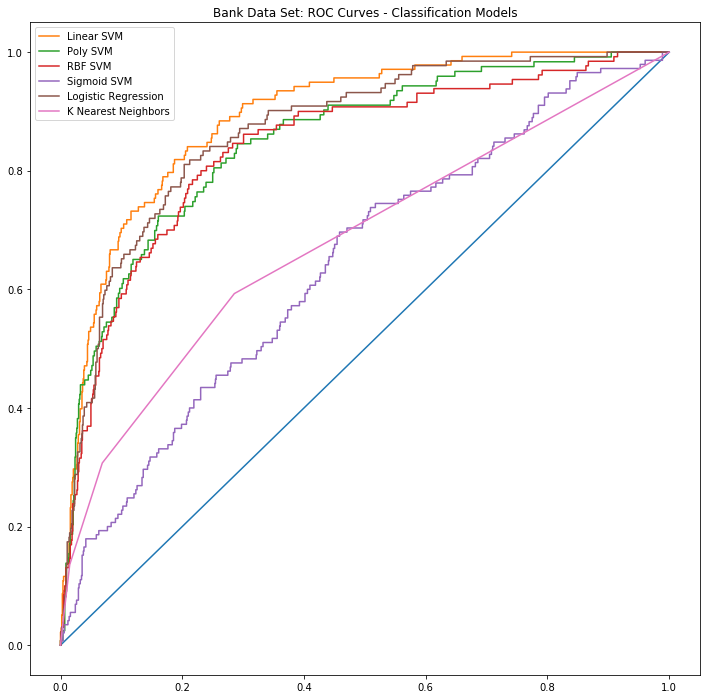

In [59]:
plt.plot([0, 1], [0,1])
plt.plot(linearfpr, lineartpr, label="Linear SVM")
plt.plot(polyfpr, polytpr, label="Poly SVM")
plt.plot(rbffpr, rbftpr, label="RBF SVM")
plt.plot(sigmoidfpr, sigmoidtpr, label="Sigmoid SVM")
plt.plot(lrfpr, lrtpr, label="Logistic Regression")
plt.plot(knnfpr, knntpr, label="K Nearest Neighbors")
plt.legend()
plt.gcf().set_size_inches(12,12)
_ = plt.title("Bank Data Set: ROC Curves - Classification Models")

In [58]:
#Perform 5 fold cross validation on each classification method.
#Return lists of accuracies
linearacc = cross_val_score(linearsvc, x_scaled, y)
polyacc = cross_val_score(polysvc, x_scaled, y)
rbfacc = cross_val_score(rbfsvc, x_scaled, y)
sigmoidacc = cross_val_score(sigmoidsvc, x_scaled, y)
logisticacc = cross_val_score(lr, x_scaled, y)
knnacc = cross_val_score(knn, x_scaled, y)

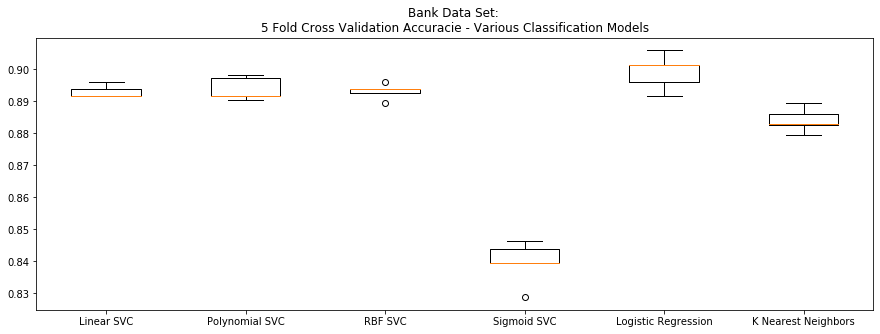

In [62]:
#Some boxplots to get an overview of the accuracies.
_ = plt.boxplot([linearacc, polyacc, rbfacc, sigmoidacc, logisticacc, knnacc])
_ = plt.xticks([1,2,3,4,5,6], labels=["Linear SVC", "Polynomial SVC", "RBF SVC",
                                   "Sigmoid SVC", "Logistic Regression", 
                                   "K Nearest Neighbors"])
_ = plt.gcf().set_size_inches(15, 5)
_ = plt.title("Bank Data Set: \n5 Fold Cross Validation Accuracies - Various Classification Models")